# Objective : Learning Item-based Collobarative Filtering System
## Problem : Consider the data given below. Using the IBCF estimate the rating for item 3 corresponding to user 2

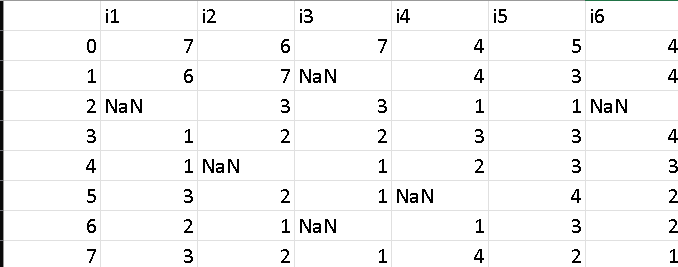

In [6]:
import pandas as pd
df=pd.read_csv("C:/Users/Mohan/ds/ibcf.csv")
df


,i1,i2,i3,i4,i5,i6
0,7.0,6.0,7.0,4.0,5,4.0
1,6.0,7.0,NaN,4.0,3,4.0
2,NaN,3.0,3.0,1.0,1,NaN
3,1.0,2.0,2.0,3.0,3,4.0
4,1.0,NaN,1.0,2.0,3,3.0
5,3.0,2.0,1.0,NaN,4,2.0
6,2.0,1.0,NaN,1.0,3,2.0
7,3.0,2.0,1.0,4.0,2,1.0


## Step 2 : Transpong the data frame to keep items along rows

In [7]:
tdf=df.transpose()
tdf


,0,1,2,3,4,5,6,7
i1,7.0,6.0,NaN,1.0,1.0,3.0,2.0,3.0
i2,6.0,7.0,3.0,2.0,NaN,2.0,1.0,2.0
i3,7.0,NaN,3.0,2.0,1.0,1.0,NaN,1.0
i4,4.0,4.0,1.0,3.0,2.0,NaN,1.0,4.0
i5,5.0,3.0,1.0,3.0,3.0,4.0,3.0,2.0
i6,4.0,4.0,NaN,4.0,3.0,2.0,2.0,1.0


## Step-3 : Consider the estimation of $r_{2,3}$ . We need to consider the most similar items to item 3 which is placed in row with index 2

In [8]:
import numpy as np
da=np.array(tdf)
da


array([[ 7.,  6., nan,  1.,  1.,  3.,  2.,  3.],
       [ 6.,  7.,  3.,  2., nan,  2.,  1.,  2.],
       [ 7., nan,  3.,  2.,  1.,  1., nan,  1.],
       [ 4.,  4.,  1.,  3.,  2., nan,  1.,  4.],
       [ 5.,  3.,  1.,  3.,  3.,  4.,  3.,  2.],
       [ 4.,  4., nan,  4.,  3.,  2.,  2.,  1.]])

### Creating the list of non-nan indices corresponding to

In [10]:
list_i2=[]
for j in range(8):
    if(np.isnan(da[2,j])==0):
        #rint("index is",j)
        list_i2.append(j)
        #rint(da[1,j])
print(list_i2)


[0, 2, 3, 4, 5, 7]


### Computing the cosine similarities with other 5 items

In [11]:
cosim=np.zeros(6)
for i in range (6):
    list_i1=[]
    if i!=2:        
        for j in range(8):
            if(np.isnan(da[i,j])==0):
                list_i1.append(j)
                # print(list_i1,list_i2)
                common=list(set(list_i1) & set(list_i2))
                # print(common)
                # ##print(i,common,da[i,common],da[1,common])
                nr=sum(da[i,common]*da[2,common])
                dr=np.sqrt(sum(da[i,common]*da[i,common])*sum(da[2,common]*da[2,common]))
                #print('cos-sim',i,nr/dr)
                cosim[i]=nr/dr
cosim


array([0.93305971, 0.97684261, 0.        , 0.79250051, 0.82173012,
       0.82751593])

### For item-3, Top-2 Most similar items are 2 (index-1) and 1(index-0); Ratings of the items 2 and 1 by user-2 are 7 and 6

In [12]:
r23_hat= (7*cosim[1]+6*cosim[0])/(cosim[1]+cosim[0])
print(r23_hat)


6.511462080383841


## Conclusion
## The estimated rating for item 3 corresponding to user 2 is 6.5